<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_2</h2>

<p> <b>Week: </b>2</p>
<p> <b>Author:</b> Pragati Koladiya </p> 
<p> <b>Tittle:</b> Assignment 2 </p>



<h1>Part 1 - Regression</h1>
<h3>Simple Linear Regression</h3>
<i>Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:</i>
  <ul><li> One variable, denoted x, is regarded as the independent variable.</li> 
    <li>The other variable, denoted y, is regarded as the dependent variable.</li> 
  </ul>
<ul><i>Regression assumptions:</i>
  <li>Y is linearly related to x or a transformation of x </li>
  <li> deviations from the regression line (residuals) follow a normal distribution</li>
  <li> deviations from the regression line (residuals) have uniform variance</li>
<ul>
  

<h3>Import packages</h3>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pylab 
import statsmodels.api as sm

from scipy import stats
from sklearn import datasets
from sklearn import linear_model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from pylab import rcParams

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

<h3>Acquire and load the data</h3>

In [2]:
#read data from google sheets 
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQDGlshox41WgzcxOQ1p64h506W1Qvql4I1YppkxNY85mi-E8cVKZFny0y5QuBMXHorKCFm3t36cdw2/pub?gid=889404183&single=true&output=csv"

adf = pd.read_csv(data_path)

In [3]:
adf.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,16.43,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.50,$52.00,Private room,1.0,1.0,1.0


<h3>
  <b> Dataset Information: </b> 
</h3>
<p> 
  <i>
  </i>
</p>
<ol style="list-style-type:squre;">
     <li><b>id</b> - Identification number</li>
     <li><b>country</b> - There is only one country to which this data set belongs to i.e Australia</li>
     <li><b>state -</b> There are two states New South Wales and Queensland</li>
     <li><b>neighbourhood_cleansed</b> - There are 4 different neighborhoods e.g Ballina shire council</li>
     <li><b>property_type</b> - The type of property that is being listed e.g House,Apartment</li>
     <li><b>square_meters</b> - The square meters for the property.</li>
     <li><b>price</b> - The cost of the rental per night in USD.</li>
     <li><b>room_type</b> - The type of room that is available for rent e.g., a shared room</li>
     <li><b>bathrooms</b> - The count of bathrooms available (e.g., 1, 2, 1.5).  </li>
     <li><b>bedrooms</b> - The count of bedrooms available (e.g., 0, 1, 2).</li>
     <li><b>beds</b> - The count of beds available in the rental (e.g., 0, 1, 2).</li>  
</ol>

<h3>Perform light data modifications</h3>

<p>
    - <i>In the state column there are two different states which is New South Wales and Queensland.</i>
</p>
<p> 
    - <i>The abbrevations NSW, nsw, Nsw, New South Wales all mean the same which is New South Wales. So we change all of these into one single value NSW.
    </i>
</p>
<p> 
    - <i>The abbrevations QLD, qld, Qld, queensland, Queensland all mean the same which is Queensland. So we change all of these into one single value QLD.</i>
</p>

In [4]:
adf=adf.replace(to_replace=['nsw','Nsw','New South Wales','NSW'], value='NSW')
adf=adf.replace(to_replace=['qld','Qld','queensland','QLD','Queensland'], value='QLD')

In [5]:
adf['state'].unique()

array(['NSW', nan, 'QLD'], dtype=object)

- <i>Identify total number of null values in each column</i>
- <i>Remove null values from all columns</i>

In [6]:
adf.isnull().sum()

id                          0
country                     0
state                     193
neighbourhood_cleansed      0
property_type               0
square_meters               0
price                       0
room_type                   0
bathrooms                   5
bedrooms                    2
beds                        1
dtype: int64

In [7]:
adf['state']=adf.state.fillna(method='ffill')
adf['bedrooms']=adf.bedrooms.fillna(method='ffill')
adf['bathrooms']=adf.bathrooms.fillna(method='ffill')
adf['beds']=adf.beds.fillna(method='ffill')

- <i>Check for null values again</i>

In [8]:
adf.isnull().sum()

id                        0
country                   0
state                     0
neighbourhood_cleansed    0
property_type             0
square_meters             0
price                     0
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
dtype: int64

- <i>Check datatype of each column</i>

In [9]:
adf.dtypes

id                          int64
country                    object
state                      object
neighbourhood_cleansed     object
property_type              object
square_meters             float64
price                      object
room_type                  object
bathrooms                 float64
bedrooms                  float64
beds                      float64
dtype: object

- <i>Price has object datatype instead of flot so we will covert it into flot</i>
- <i>Price is stored with dollar symbol and coma(ex. $2,900.00). For converting flot first we need to remove symbols</i>

In [10]:
adf['price'].head(5)

0    $2,900.00
1       $28.00
2      $141.00
3       $50.00
4       $52.00
Name: price, dtype: object

In [11]:
adf.price = adf.price.apply(lambda x: str(x).replace("$",""))
adf.price = adf.price.apply(lambda x: str(x).replace(",",""))

In [12]:
adf['price'].head(5)

0    2900.00
1      28.00
2     141.00
3      50.00
4      52.00
Name: price, dtype: object

- <i>Now symobol and coma is removed. Next step is to convert it in flot</i>

In [13]:
adf.price = pd.to_numeric(adf.price)

In [14]:
adf.dtypes

id                          int64
country                    object
state                      object
neighbourhood_cleansed     object
property_type              object
square_meters             float64
price                     float64
room_type                  object
bathrooms                 float64
bedrooms                  float64
beds                      float64
dtype: object

=> <i>Price datatype is converted to flot.</i>

<h3>Graph for neighborhoods count</h3>

In [15]:
adf['neighbourhood_cleansed'].value_counts()

BYRON SHIRE COUNCIL        2496
TWEED SHIRE COUNCIL         880
BALLINA SHIRE COUNCIL       453
LISMORE CITY COUNCIL        127
RICHMOND VALLEY COUNCIL      18
Name: neighbourhood_cleansed, dtype: int64

Text(0.5, 1.0, 'Count plot by neighborhood')

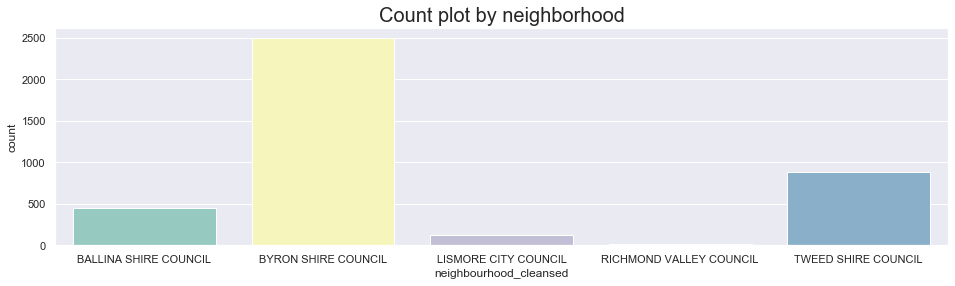

In [16]:
#Count plot

sns.set_style('whitegrid')
plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
sns.set(palette='Set3')
sns.countplot(adf['neighbourhood_cleansed'])
plt.title("Count plot by neighborhood", fontsize=20)

<h3>Graph for property type count</h3>

In [17]:
adf['property_type'].value_counts()

House           2421
Apartment        966
Guest suite      260
Guesthouse       220
Camper/RV         42
Nature lodge      23
Loft              23
Other             19
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Count plot by property type')

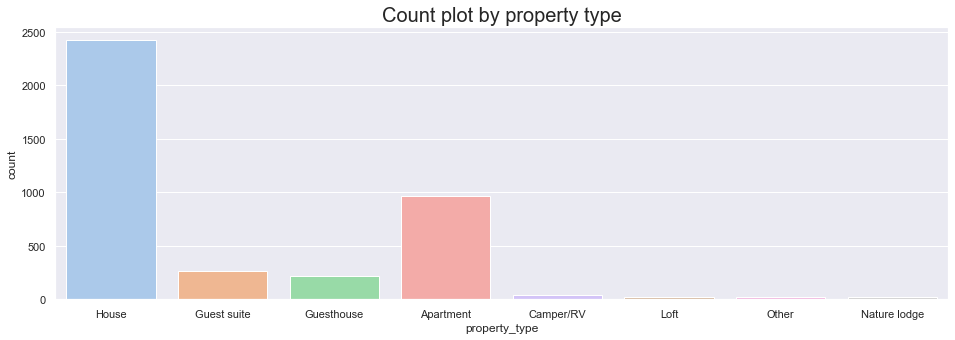

In [18]:
# count plot for property type count
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.set(style='whitegrid')
sns.set(palette='pastel')
sns.countplot(adf['property_type'])
plt.title("Count plot by property type", fontsize=20)

<h3>Graph for room type count</h3>

In [19]:
adf['room_type'].value_counts()

Entire home/apt    3222
Private room        749
Shared room           3
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Count plot by room type')

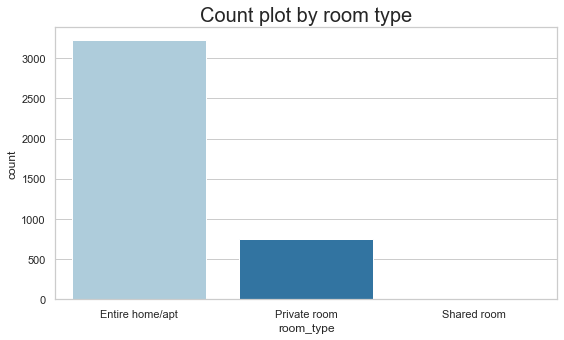

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,5))
sns.set(style='whitegrid')
sns.set_palette("Paired")
sns.countplot(adf['room_type'])
plt.title("Count plot by room type", fontsize=20)

<h3>Graph for number of bedrooms</h3>

In [21]:
adf['bedrooms'].value_counts()

1.0     1266
3.0      938
2.0      802
4.0      572
0.0      210
5.0      128
6.0       41
7.0       13
9.0        1
10.0       1
12.0       1
8.0        1
Name: bedrooms, dtype: int64

Text(0.5, 1.0, 'Count plot by bedrooms')

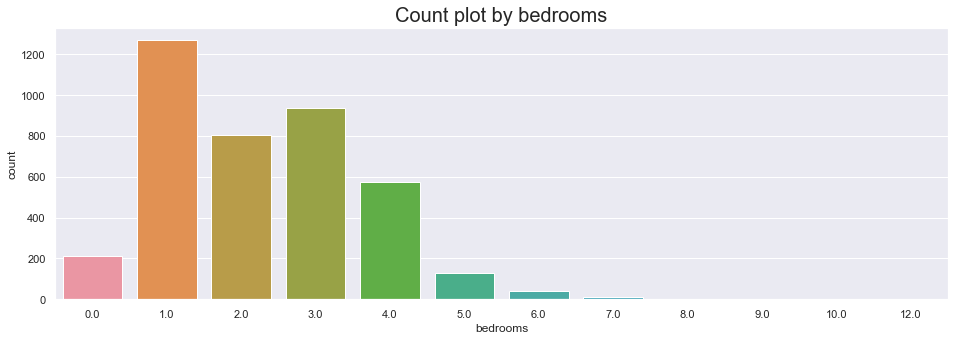

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.set(style='whitegrid')
sns.set(palette='Set1')
sns.countplot(adf['bedrooms'])
plt.title("Count plot by bedrooms", fontsize=20)

=> <i>Most of the properties have 1 to 4 bedrooms.</i>

<h1>Ballina Shire Council</h1>

<p>Regression analysis is a form of predictive modeling technique which investigates the relationship between a dependent and independent variable.
</p>

<ul >Three major uses for regression analysis are,
    <li>Determining the gtrength of predicators</li>
    <li>Forecasting an effect</li>
    <li>Trend Forcasting</li>   
</ul>

<p>Here, we will predict the <i>'House' price based on the square meters</i> for <b>Ballina Shire Council</b> in the state of <b>New South Wales</b>.
</p>


<p><b>Independent variable (X):</b> Square feet of the house</p>
<p><b>Dependent variable (Y):</b> House price </p>

In [23]:
#Trim outliers:

start_percentile_price = adf['price'].quantile(.01)
end_percentile_price = adf['price'].quantile(.99)

#CONDITION 1
data1= adf.loc[((adf['price'] > 1) & (adf['price'] < 2450))]

# CONDITION 2
data2= data1.loc[((data1['square_meters'] < 80)&(data1['square_meters'] > 2))]

final_df=data2.copy()

- <i>Here I'm going to <b>drop the id,country and beds columns</b>. Id is uniquely identify the country Australia which is the only country in entire dataset. Also the beds column will be droped because it will not help in making any further inferences.</i>

In [24]:
dc1= data2.loc[(data2['neighbourhood_cleansed']=='BALLINA SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [25]:
aust_df=dc4.drop(columns=['id','country','beds'])
aust_df.describe()

,square_meters,price,bathrooms,bedrooms
count,192.000000,192.000000,192.000000,192.000000
mean,38.264323,923.046875,2.023438,3.177083
std,11.295130,634.249784,0.786484,1.180068
min,17.970000,75.000000,1.000000,0.000000
25%,29.260000,367.500000,1.500000,2.750000
50%,37.735000,785.000000,2.000000,3.000000
75%,46.277500,1439.500000,2.500000,4.000000
max,63.890000,2410.000000,5.000000,7.000000


Text(0.5, 1.0, 'Scatter plot for Ballina Shire Councile')

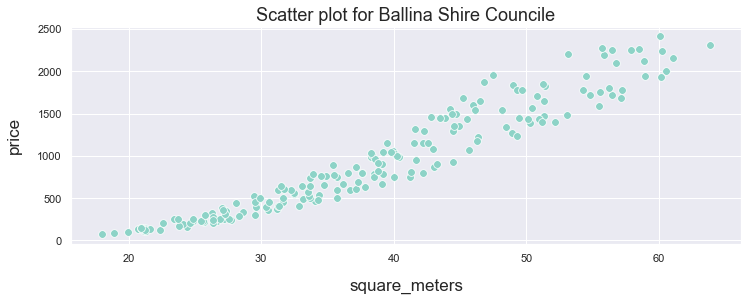

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);

sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df , s=60)
plt.title("Scatter plot for Ballina Shire Councile", fontsize=18)

- <i><b>Fit a line with Sci-Kit Learn</b> </i>

In [27]:
regression_data = stats.linregress(aust_df.square_meters,aust_df.price)
regression_data

LinregressResult(slope=53.99809613480821, intercept=-1143.1537123875114, rvalue=0.9616329778538106, pvalue=1.1311078521449932e-108, stderr=1.117584120132949)

In [28]:
bsc = range(10,6000)
lin_reg = LinearRegression()

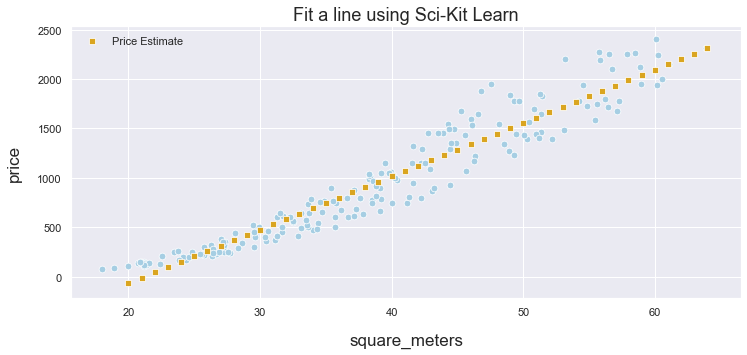

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Paired')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Sci-Kit Learn", fontsize=18)

bsc = range(20,65,1)
estimate_price =( regression_data.slope *bsc) + regression_data.intercept
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df , s = 45)
sns.scatterplot(bsc, estimate_price, color = 'goldenrod', marker="s", label='Price Estimate')

- <i><b>Fit the line using graph Regplot</b></i>

(10, 3000)

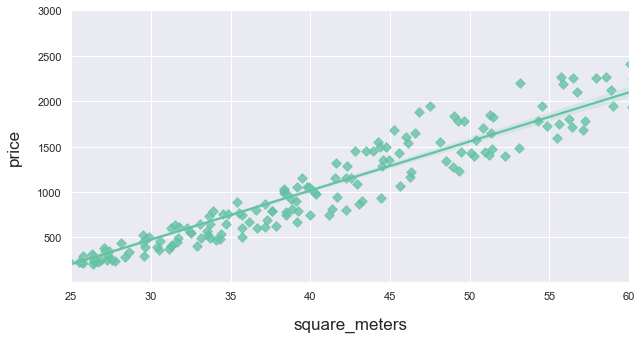

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);


ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df, scatter_kws={'s':45}, 
                 marker="D")
plt.xlim([25,60])
plt.ylim([10,3000])


In [31]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df)
column_length = len(aust_df[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aust_df['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

<h2>Coefficient of determination</h2>

- <p>R2 values is a statistical measure of how close the data are to the fitted regression line.It is denoted by R2(R-Squred).</p>

- <p>It is also known as co-efficient of determination.</p>

- <p>The coefficient of determination R2 will have a value between 0 and 1. </p>

- <p>A value of R2 near 1 indicates that most of the variation of the response data is explained by the different input values, whereas a value of R2 near 0 indicates that little of the variation is explained by the different input values.</p>


In [32]:
#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

Intercept: -1124.859009051655


In [33]:
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0    594.245652
1    916.877248
2    960.001273
3    451.031296
4    -10.023097



In [34]:
#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

   square_meters
0      53.239537



In [35]:
#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(y_test, listing_y_pred))


Mean Squared Error (MSE) = 22866.65


In [36]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):151.22


In [37]:
# Explained variance score:
print('Variance Score (R-Square) = %.2f' % r2_score(y_test, listing_y_pred))

Variance Score (R-Square) = 0.95


=> Variance Score (R^2) meaning that percantage of the variance in Y(price) is predictable from X(square_meter).

<h2>Residuals</h2>

Text(0.5, 1.0, 'Histogram of Residuals')

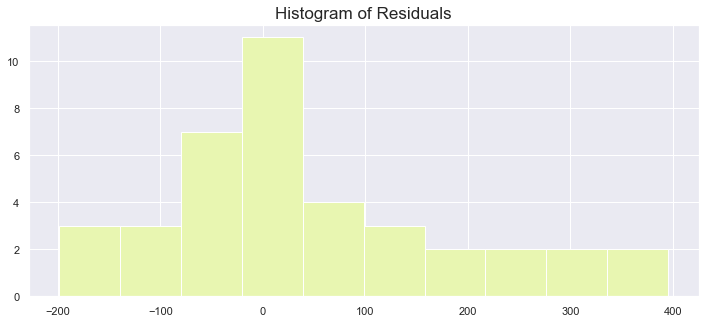

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='YlGnBu')

res = y_test - listing_y_pred
plt.hist(res)
plt.title("Histogram of Residuals", fontsize=17)

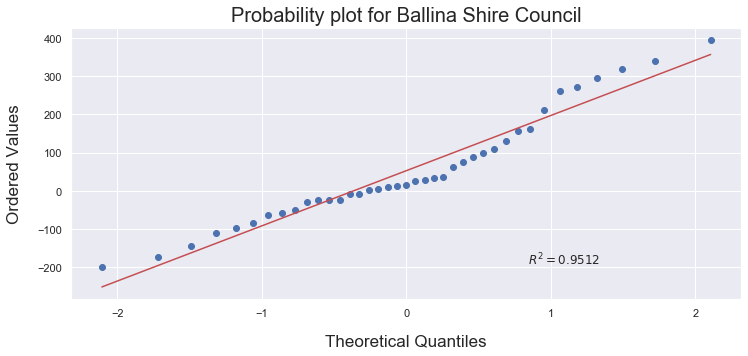

In [39]:
#probability plot

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

res_reshaped = res.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Ballina Shire Council", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

(10, 3000)

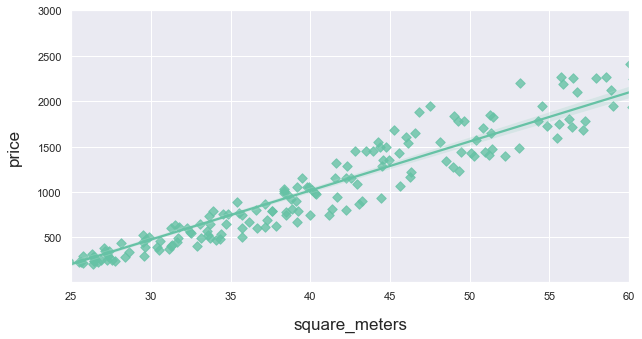

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);


ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df, scatter_kws={'s':45}, 
                 marker="D")
plt.xlim([25,60])
plt.ylim([10,3000])


<h1>Byron Shire Council</h1>


In [41]:
dc1= data2.loc[(data2['neighbourhood_cleansed']=='BYRON SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [42]:
aust_df1 = dc4.drop(columns=['id','country','beds'])
aust_df1.describe()

,square_meters,price,bathrooms,bedrooms
count,1065.000000,1065.000000,1065.000000,1065.000000
mean,29.452178,1068.536150,1.929108,3.061033
std,3.626670,592.078048,0.794067,1.052670
min,4.000000,79.000000,0.000000,0.000000
25%,27.710000,600.000000,1.000000,3.000000
50%,29.910000,990.000000,2.000000,3.000000
75%,31.780000,1549.000000,2.500000,4.000000
max,77.000000,2427.000000,6.000000,7.000000


Text(0.5, 1.0, 'Scatter plot for Byron Shire Councile')

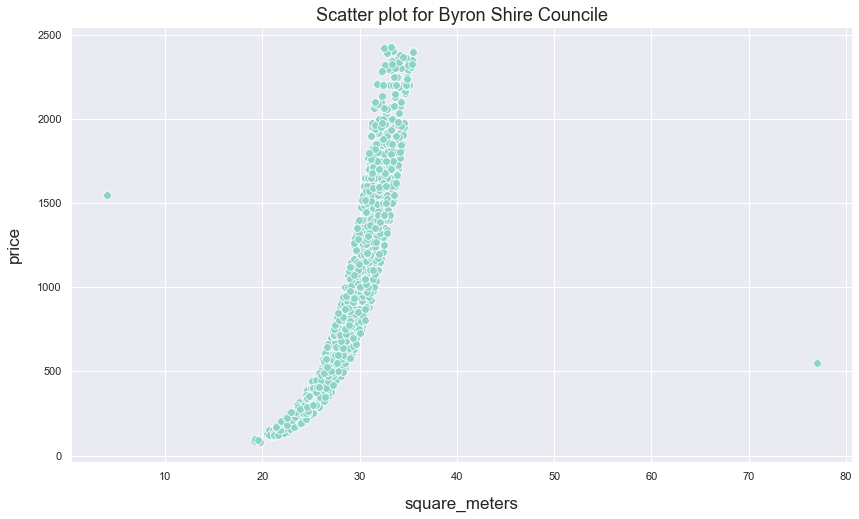

In [43]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);

sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df1 , s=60)
plt.title("Scatter plot for Byron Shire Councile", fontsize=18)

- <i><b>Fit a line with Sci-Kit Learn</b> </i>

In [44]:
regression_data = stats.linregress(aust_df1.square_meters,aust_df1.price)
regression_data

LinregressResult(slope=128.01634267834683, intercept=-2701.8240129242754, rvalue=0.7841416873964102, pvalue=1.7350890480624686e-222, stderr=3.107443920556067)

In [45]:
bsc = range(10,3000)
lin_reg = LinearRegression()


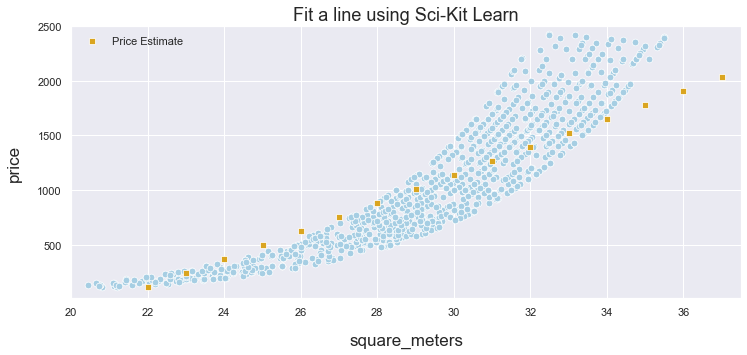

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Paired')
plt.xlim([20,37.5])
plt.ylim([10,2500])

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Sci-Kit Learn", fontsize=18)

bsc = range(19,40,1)
estimate_price =( regression_data.slope *bsc) + regression_data.intercept
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df1 , s = 45)
sns.scatterplot(bsc, estimate_price, color = 'goldenrod', marker="s", label='Price Estimate')

- <i><b>Fit the line using graph Regplot</b></i>

(10, 3000)

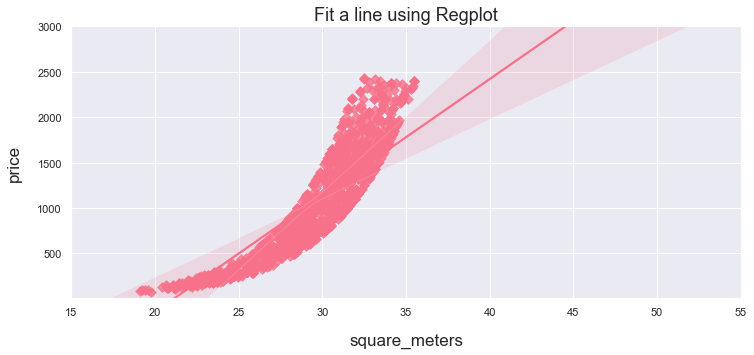

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='husl')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Regplot", fontsize=18)


ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df1, scatter_kws={'s':45}, 
                 marker="D")
plt.xlim([15,55])
plt.ylim([10,3000])


In [48]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df1[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df1)
column_length = len(aust_df1[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aust_df1['price'].values
y = y.reshape(data_length,1)
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
  
poly = PolynomialFeatures(degree = 5) 
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.fit_transform(X_test) 

poly.fit(X_train_poly, y_train) 

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test_poly)

In [49]:
#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

Intercept: -248.42693461083172


In [50]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0    982.676918
1   1856.537091
2   1223.053469
3    258.186675
4    921.339514



In [51]:
coeff_df = pd.DataFrame(lin_reg.coef_)
print(coeff_df)
print()

     0           1          2         3         4         5
0  0.0  735.356103 -84.977753  3.447325 -0.055067  0.000299



In [52]:
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(y_test, listing_y_pred))

Mean Squared Error (MSE) = 44467.82


In [53]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):210.87


In [54]:
print('Variance Score (R-Square) = %.2f' % r2_score(y_test, listing_y_pred))

Variance Score (R-Square) = 0.88


=> Variance Score (R^2) meaning that percantage of the variance in Y(price) is predictable from X(square_meter).

<h2>Residuals</h2>

Text(0.5, 1.012, 'Histogram of Residuals')

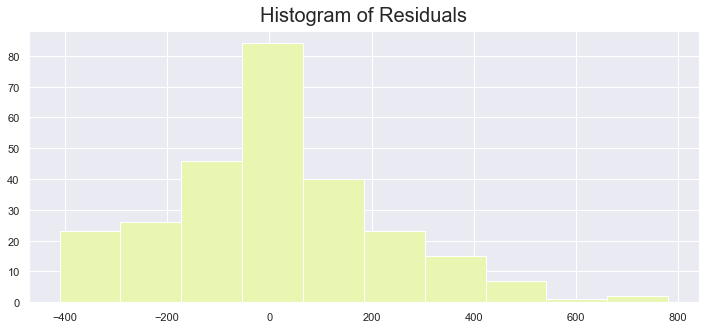

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='YlGnBu')

res = y_test - listing_y_pred
plt.hist(res)
plt.title("Histogram of Residuals", fontsize=20, y=1.012)


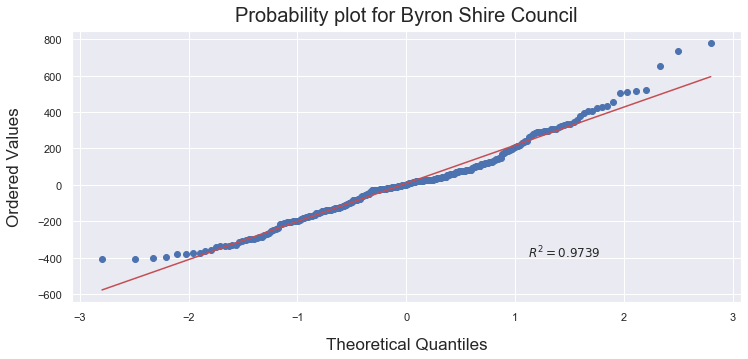

In [56]:
#probability plot

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

res_reshaped = res.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Byron Shire Council", fontsize=20, y=1.012)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

<h1>Lismore city Council</h1>

In [57]:
dc1= data2.loc[(data2['neighbourhood_cleansed']=='LISMORE CITY COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]

In [58]:
aust_df2=dc3.drop(columns=['id','country','beds'])
aust_df2.describe()

,square_meters,price,bathrooms,bedrooms
count,80.000000,80.000000,80.000000,80.000000
mean,40.162500,321.312500,1.456250,2.212500
std,20.271851,441.384117,0.637408,1.121637
min,5.000000,30.000000,1.000000,0.000000
25%,23.750000,77.750000,1.000000,1.000000
50%,38.000000,156.000000,1.000000,2.000000
75%,58.250000,363.750000,2.000000,3.000000
max,74.000000,2295.000000,3.000000,5.000000


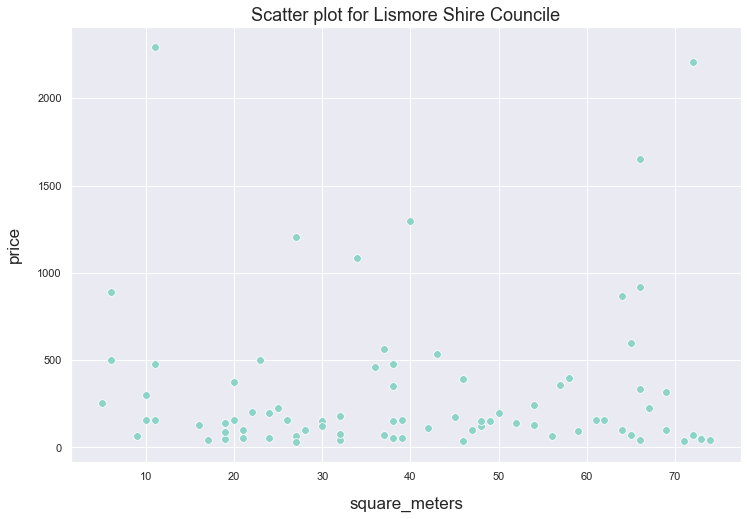

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Scatter plot for Lismore Shire Councile", fontsize=18)

sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df2 , s=60)

- <i><b>Fit a line with Sci-Kit Learn</b> </i>

In [60]:
regression_data = stats.linregress(aust_df2.square_meters,aust_df2.price)
regression_data

LinregressResult(slope=0.39784328530323654, intercept=305.33411905400874, rvalue=0.018272111487497394, pvalue=0.8721942336523585, stderr=2.464923718001506)

In [61]:
bsc = range(10,3000)
lin_reg = LinearRegression()


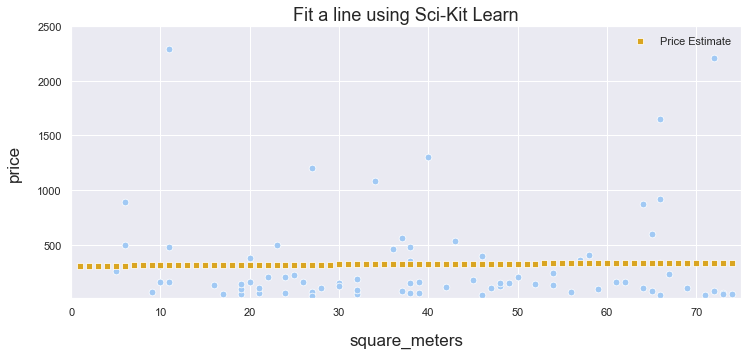

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='pastel')
plt.xlim([0,75])
plt.ylim([10,2500])

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Sci-Kit Learn", fontsize=18)

bsc = range(1,75,1)
estimate_price =( regression_data.slope *bsc) + regression_data.intercept
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df2 , s = 45)
sns.scatterplot(bsc, estimate_price, color = 'goldenrod', marker="s", label='Price Estimate')

- <i><b>Fit the line using graph Regplot</b></i>

(10, 3000)

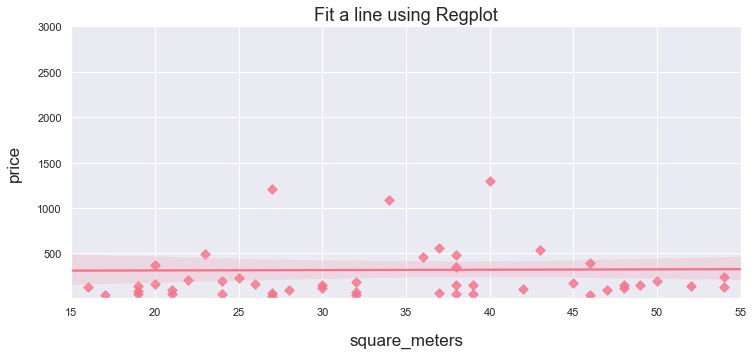

In [63]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='husl')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Regplot", fontsize=18)


ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df2, scatter_kws={'s':45}, 
                 marker="D")
plt.xlim([15,55])
plt.ylim([10,3000])


In [64]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df2[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df2)
column_length = len(aust_df2[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aust_df2['price'].values
y = y.reshape(data_length,1)
y = y.reshape(data_length,1) 

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
  
poly = PolynomialFeatures(degree = 5) 
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.fit_transform(X_test) 

poly.fit(X_train_poly, y_train) 

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test_poly)

In [65]:
#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

Intercept: 735.008099700698


In [66]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0    127.791363
1    392.407599
2    475.281991
3    317.689152
4    169.770896



In [67]:
coeff_df = pd.DataFrame(lin_reg.coef_)
print(coeff_df)
print()

     0          1         2         3         4         5
0  0.0 -29.899161  0.972958 -0.048241  0.001162 -0.000008



In [68]:
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(y_test, listing_y_pred))

Mean Squared Error (MSE) = 242344.20


In [69]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):492.28


In [70]:
print('Variance Score (R-Square) = %.2f' % r2_score(y_test, listing_y_pred))

Variance Score (R-Square) = -0.57


=> Variance Score (R^2) meaning that percantage of the variance in Y(price) is predictable from X(square_meter).

<h2>Residuals</h2>

Text(0.5, 1.012, 'Histogram of Residuals')

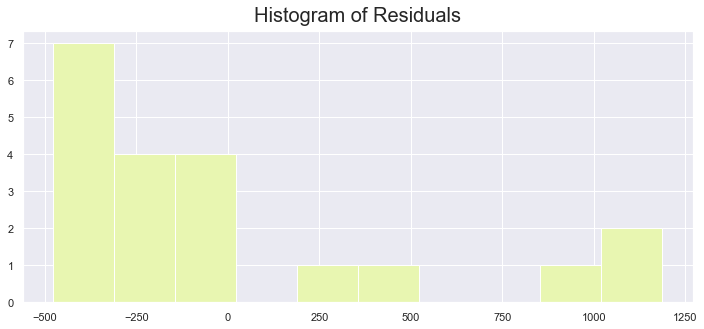

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='YlGnBu')

res = y_test - listing_y_pred
plt.hist(res)
plt.title("Histogram of Residuals", fontsize=20, y=1.012)


#residuals=y_test-listing_y_pred
#plt.hist(residuals)
#plt.title("Histogram of Residuals")

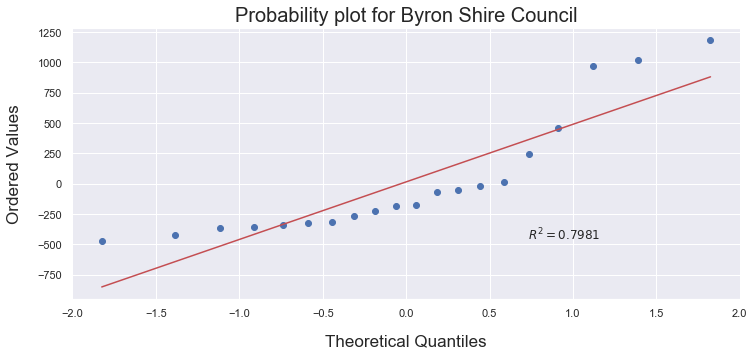

In [72]:
#probability plot

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

res_reshaped = res.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Byron Shire Council", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

<h1>Tweed Shire Council</h1>

In [73]:
dc1= data2.loc[(data2['neighbourhood_cleansed']=='TWEED SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [74]:
aust_df3=dc4.drop(columns=['id','country','beds'])
aust_df3.describe()

,square_meters,price,bathrooms,bedrooms
count,324.000000,324.000000,324.000000,324.000000
mean,48.755525,814.811728,2.138889,3.407407
std,14.508628,495.704170,0.763425,1.073495
min,3.290000,78.000000,1.000000,0.000000
25%,40.402500,418.000000,2.000000,3.000000
50%,52.745000,700.000000,2.000000,3.500000
75%,59.385000,1250.000000,2.500000,4.000000
max,68.630000,1851.000000,4.000000,6.000000


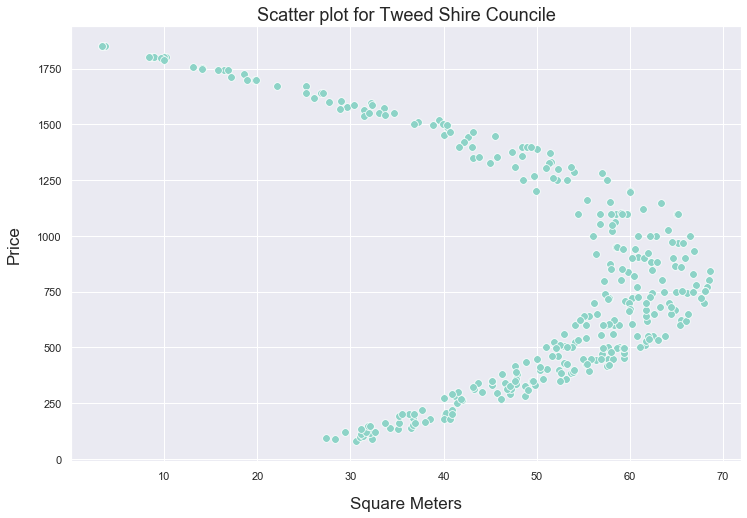

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Scatter plot for Tweed Shire Councile", fontsize=18)

sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df3, s=60)
plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);

- <i><b>Fit a line with Sci-Kit Learn</b> </i>

In [76]:
regression_data = stats.linregress(aust_df3.square_meters,aust_df3.price)
regression_data


LinregressResult(slope=-12.3310940748756, intercept=1416.0206900341177, rvalue=-0.360915365016378, pvalue=2.105937953445783e-11, stderr=1.7756732434410603)

In [77]:
bsc = range(10,3000)
lin_reg = LinearRegression()

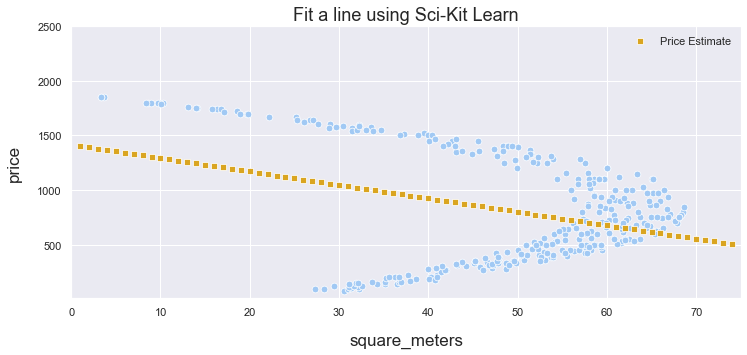

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='pastel')
plt.xlim([0,75])
plt.ylim([10,2500])

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Sci-Kit Learn", fontsize=18)

bsc = range(1,75,1)
estimate_price =( regression_data.slope *bsc) + regression_data.intercept
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df3 , s = 45)
sns.scatterplot(bsc, estimate_price, color = 'goldenrod', marker="s", label='Price Estimate')

- <i><b>Fit the line using graph Regplot</b></i>

(10, 3000)

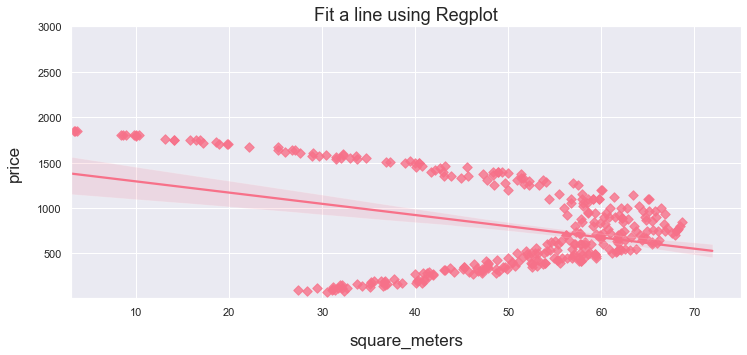

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='husl')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
plt.title("Fit a line using Regplot", fontsize=18)


ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df3, scatter_kws={'s':45}, 
                 marker="D")
plt.xlim([3,75])
plt.ylim([10,3000])

In [80]:
X_cols = ['square_meters']

#Load the X data set
X = aust_df3[X_cols].values

#Initialize the data and column length variables
data_length = len(aust_df3)
column_length = len(aust_df3[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = aust_df3['price'].values
y = y.reshape(data_length,1)
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)
  
poly = PolynomialFeatures(degree = 5) 
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.fit_transform(X_test) 

poly.fit(X_train_poly, y_train) 

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test_poly)

In [81]:
#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

Intercept: 1009.2815246363559


In [82]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

   y_prediction
0    786.414152
1    788.080445
2   1897.330283
3    604.912220
4    781.073112



In [83]:
coeff_df = pd.DataFrame(lin_reg.coef_)
print(coeff_df)
print()

     0           1          2         3        4         5
0  0.0  239.935048 -18.947392  0.518558 -0.00606  0.000026



In [84]:
print("Mean Squared Error (MSE) = %.2f" % mean_squared_error(y_test, listing_y_pred))

Mean Squared Error (MSE) = 183163.77


In [85]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):427.98


In [86]:
print('Variance Score (R-Square) = %.2f' % r2_score(y_test, listing_y_pred))

Variance Score (R-Square) = 0.22


=> Variance Score (R^2) meaning that percantage of the variance in Y(price) is predictable from X(square_meter).

<h2>Residuals</h2>

Text(0.5, 1.0, 'Histogram of Residuals')

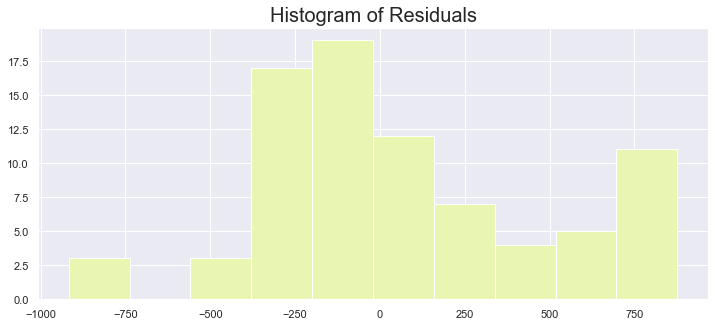

In [87]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='YlGnBu')

res = y_test - listing_y_pred
plt.hist(res)
plt.title("Histogram of Residuals", fontsize=20)

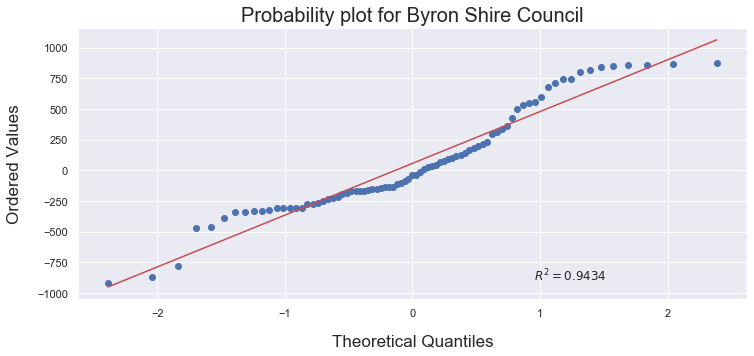

In [88]:
#probability plot

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set(style='whitegrid')
sns.set(palette='Set2')

res_reshaped = res.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Byron Shire Council", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

<h2>Scatter plot of four counciles</h2>

Text(0.5, 1.0, 'Scatter plot for all councile')

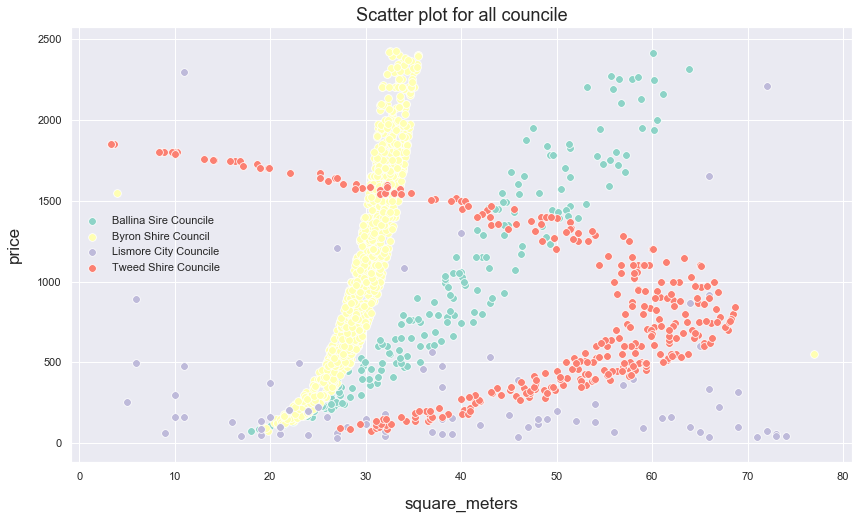

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);
# Ballina Sire Councile
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df , s=60, label='Ballina Sire Councile')
# Byron Shire Council
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df1 , s=60, label='Byron Shire Council' )
#Lismore City Councile
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df2 , s=60, label='Lismore City Councile')
#Tweed Shire Councile
sns.scatterplot(x = 'square_meters', y = 'price', data = aust_df3 , s=60, label='Tweed Shire Councile')

plt.title("Scatter plot for all councile", fontsize=18)

<h2>Regplot of four counciles</h2>

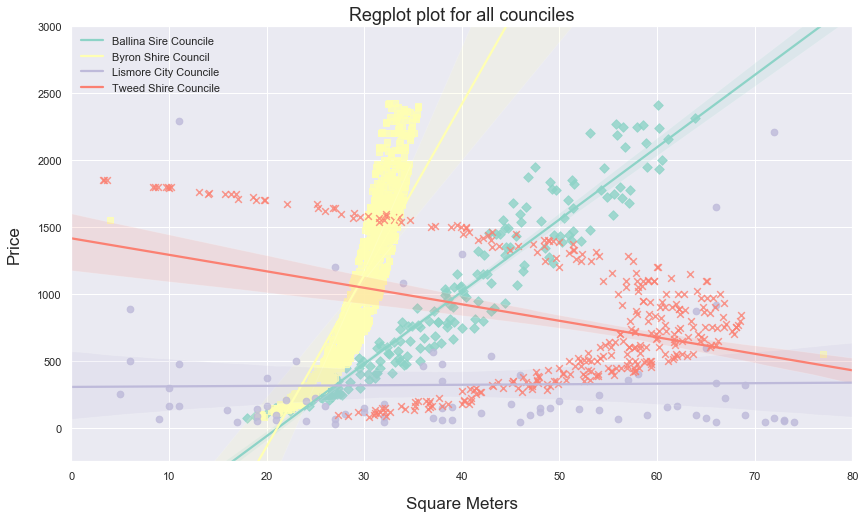

In [90]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
sns.set(palette='Set3')

plt.xlim([0,80])
plt.ylim([-250,3000])

#Ballina Sire Councile
ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df, scatter_kws={'s':45},
                 marker="D")

#Byron Shire Council 
ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df1, scatter_kws={'s':45}, 
                 marker="s")

#Lismore City Councile
ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df2, scatter_kws={'s':45},  
                 marker="o")
#Tweed Shire Councile
ax = sns.regplot(x = 'square_meters', y = 'price', data = aust_df3, scatter_kws={'s':45},  
                 marker="x")

plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);                 
plt.title("Regplot plot for all counciles", fontsize=18)
plt.legend(['Ballina Sire Councile','Byron Shire Council','Lismore City Councile','Tweed Shire Councile'])

<h2>INFERENCES:</h2>

- <p> Firstly, imported the data set. Performed some manipulations like removing null values, outliers etc.</p>

- <p> Next, find the relationship between the area of the house and the price for each neighborhood </p>

- <p> For <b> Richmond city council</b> there are only <b>18 data points</b> which are distributed randomly. These points are mostly outliers if we consider all the neighborhoods together</p>
